In [ ]:
from environment import BreakoutWrapper
import numpy as np

import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import ale_py
gym.register_envs(ale_py)
import matplotlib.pyplot as plt

In [6]:
#env = gym.make("ALE/Breakout-v5")
breakout_env = BreakoutWrapper(game="ALE/Breakout-v5", render_mode=None, device="cuda")

In [ ]:
def get_raw_and_processed_obs(env: BreakoutWrapper, crop_region: tuple | None = (20,104), verbose: bool = False):
    # Get a single raw frame from the environment
    raw_obs = env.env.reset()[0]

    # Get preprocessed frame from the BreakoutWrapper
    processed_obs = env._preprocess(raw_obs, crop_region=crop_region)

    if verbose:
        print(f"Raw frame shape: {raw_obs.shape}")
        print(f"Raw frame dtype: {raw_obs.dtype}")
        print(f"Raw frame value range: [{raw_obs.min()}, {raw_obs.max()}]")

        print(f"\nPreprocessed frame shape: {processed_obs.shape}")
        print(f"Preprocessed frame dtype: {processed_obs.dtype}")
        print(f"Preprocessed frame value range: [{processed_obs.min()}, {processed_obs.max()}]")

    return raw_obs, processed_obs

In [ ]:
def plot_frames(raw_frame: np.ndarray, preprocessed_frame: np.ndarray, figsize=(12, 5)):
    
    # Visualize both frames side by side
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Display raw frame
    axes[0].imshow(raw_frame)
    axes[0].set_title(f'Raw Frame\nShape: {raw_frame.shape}')
    axes[0].axis('off')

    # Display preprocessed frame
    axes[1].imshow(preprocessed_frame.to("cpu").squeeze(0).squeeze(0), cmap='gray')
    axes[1].set_title(f'Preprocessed Frame\nShape: {preprocessed_frame.shape}')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [27]:
raw_frame, preprocessed_frame = get_raw_and_processed_obs(breakout_env, crop_region=(20,104))

Raw frame shape: (210, 160, 3)
Raw frame dtype: uint8
Raw frame value range: [0, 200]

Preprocessed frame shape: torch.Size([1, 1, 84, 84])
Preprocessed frame dtype: torch.float32
Preprocessed frame value range: [0.0, 0.5882353186607361]


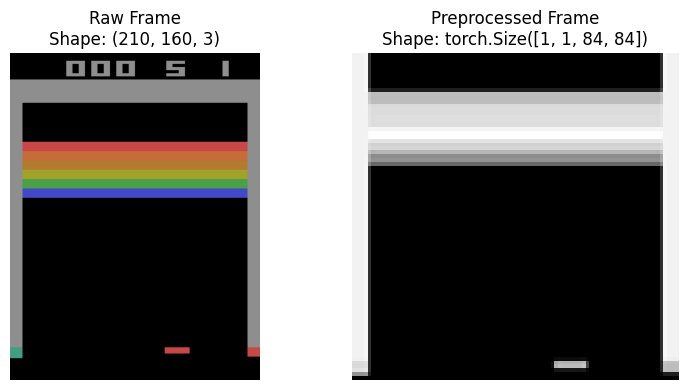

In [35]:
plot_frames(raw_frame, preprocessed_frame, figsize=(8, 4))

Raw frame shape: (210, 160, 3)
Raw frame dtype: uint8
Raw frame value range: [0, 200]

Preprocessed frame shape: torch.Size([1, 1, 84, 84])
Preprocessed frame dtype: torch.float32
Preprocessed frame value range: [0.0, 0.5882353186607361]


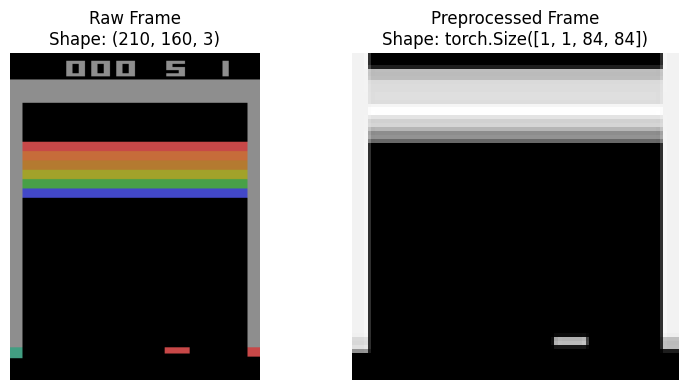

In [36]:
raw_frame, processed_frame = get_raw_and_processed_obs(breakout_env, crop_region=None)
plot_frames(raw_frame, processed_frame, figsize=(8, 4))

**Observations**:
* The frame was correctly converted from RGB to grayscale: going from 3 channels to 1 channel.
* The frame was correctly resized from (210, 160) to (84, 84), with a resize and a crop operation. The crop operation correctly focused on the play area of the game, removing unnecessary parts of the image (e.g., score, borders).

**Conclusion**:
The preprocessing steps have been successfully applied to the Atari game frame, preparing it for input into a reinforcement learning model.